In [4]:
import pandas as pd
path = "C:/Users/shrra/Downloads/2024-06-25T13-17_export.csv"
datafram =pd.read_csv(path)

In [5]:
def determine_new_race_5(row):
    if row['race___5'] and row['ethnicity'] == "Hispanic or Latino":
        return False
    else:
        return row['race___5']

# Apply the function to create the new column
datafram['new_race___5'] = datafram.apply(determine_new_race_5, axis=1)

# Remove rows where race___5 is false and race___8 is true
datafram = datafram[~((datafram['race___5'] == False) & (datafram['race___8'] == True))]

# race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8','new_race___5']  
# race_counts = datafram[race_columns].sum()
# plt.figure(figsize=(10, 6))
# sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
# plt.xlabel('Race')
# plt.ylabel('Count')
# plt.title('Number of Counts Available for Each Race')
# plt.show()

In [6]:
import os
import json
df = datafram


def add_json_contents_to_df(df, base_folder_path):
    # Initialize a list to hold dictionaries of JSON data
    json_data_list = []
    
    for record_id in df['record_id']:
        json_file_name = f"sub-{record_id}_participant.json"
        folder_path = os.path.join(base_folder_path, f'sub-{record_id}')
        json_file_path = os.path.join(folder_path, json_file_name)
        
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as file:
                json_data = json.load(file)
                emp_data = {'record_id': record_id}
                
                for item in json_data.get('item', []):
                    link_id = item.get('linkId')
                    answer_value = None
                    
                    # Check if 'answer' key exists and is not empty
                    if 'answer' in item and item['answer']:
                        answer = item['answer'][0]
                        if 'valueString' in answer:
                            answer_value = answer['valueString']
                        elif 'valueBoolean' in answer:
                            answer_value = answer['valueBoolean']
                    
                    emp_data[link_id] = answer_value
                
                json_data_list.append(emp_data)
        else:
            print(f"JSON file not found for record_id: {record_id}")
    
    # Create a DataFrame from the JSON data list
    json_df = pd.DataFrame(json_data_list)
    
    # Merge the original df with the new json_df on 'record_id'
    merged_df = pd.merge(df, json_df, on='record_id', how='left')
    
    return merged_df
 

# Assuming 'df' is your original DataFrame
# Replace 'base_folder_path' with your actual folder path
merged_df = add_json_contents_to_df(df, base_folder_path='C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/')
print(merged_df)


     Unnamed: 0                             record_id  \
0             0  8d5dc52b-e8aa-42e7-ae54-8f05c4667d39   
1             1  1b07b18b-26f9-405b-a466-29442306a7fe   
2             2  e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5   
3             3  943a8bbc-bba0-4853-825c-10cae1b26ddd   
4             4  d5aeba9f-c910-4b65-81e8-0e9ad15097e7   
..          ...                                   ...   
174         174  2b1c662a-59e0-4b69-9161-a2fd4636890b   
175         175  66a03988-159c-4a3a-954b-7b4fc8320b51   
176         176  dbd7641f-f3db-4d08-8f63-2e0e7bbb8f3d   
177         177  8e9349f8-64f6-4558-ac9b-4d15c7649a80   
178         178  ba749edd-38d9-4f87-8742-c71010177050   

                  demographics_session_id  demographics_duration  \
0    B176636C-3330-4AB4-93A9-1E2305506407                    173   
1    8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2                    258   
2    B94FE4BC-79FF-46A1-86CC-628E2D77874E                    249   
3    35002E1F-A963-4E9C-8F2A-738839D83C4D  

In [7]:
selected_json_columns = [
    'demographics_session_id', 'demographics_duration', 'demographics_completed_by___1',
    'demographics_completed_by___2', 'demographics_completed_by___3', 'state_province', 'country',
    'gender_identity', 'specify_gender_identity', 'sexual_orientation', 'race___1', 'race___2',
    'race___3', 'race___4', 'race___5', 'race___6', 'race___7', 'race___8', 'ethnicity', 'other_edu_level',
    'hearing', 'vision', 'cognition', 'mobility', 'self_care', 'independent_living', 'employ_status___1',
    'employ_status___2', 'employ_status___3', 'employ_status___4', 'employ_status___5', 'employ_status___6',
    'employ_status___7', 'employ_status___8', 'employ_status___9', 'household_income_usa', 'household_income_ca',
    'marital_status___1', 'marital_status___2', 'marital_status___3', 'marital_status___4', 'marital_status___5',
    'marital_status___6', 'marital_status___7', 'housing_status', 'household_count', 'spouse_partner_sig_other',
    'children', 'parent', 'grandparent', 'other_live_with', 'others_household_specify', 'transportation_yn',
    'primary_transportation', 'q_generic_demographics_complete', 'new_race___5', 'selected_language',
    'enrollment_institution', 'age', 'eligible_studies___1', 'eligible_studies___2', 'eligible_studies___3',
    'eligible_studies___4', 'eligible_studies___5', 'is_control_participant', 'laryng_cancer', 'benign_cord_lesion',
    'rrp', 'spas_dys', 'voc_fold_paralysis', 'alz_dementia_mci', 'als', 'parkinsons', 'alcohol_subst_abuse', 'gad',
    'add_adhd', 'asd', 'bipolar', 'bpd', 'depression', 'ed', 'insomnia', 'ocd', 'panic', 'ptsd', 'schizophrenia',
    'soc_anx_dis', 'other_psych', 'asthma', 'airway_stenosis', 'chronic_cough', 'copd', 'osa']


selected_df = merged_df

df = selected_df[selected_json_columns]

In [8]:
def count_boolean_values(df):
    boolean_counts = {}
    for column in df.columns:
        if df[column].dtype == 'bool':
            counts = df[column].value_counts()
            boolean_counts[column] = {
                'True': counts.get(True, 0),
                'False': counts.get(False, 0)
            }
    return boolean_counts


boolean_value_counts = count_boolean_values(df)

for column, counts in boolean_value_counts.items():
    print(f"Column: {column}")
    print(f"True: {counts['True']}")
    print(f"False: {counts['False']}")
    print()

Column: demographics_completed_by___1
True: 178
False: 1

Column: demographics_completed_by___2
True: 3
False: 176

Column: demographics_completed_by___3
True: 1
False: 178

Column: race___1
True: 5
False: 174

Column: race___2
True: 9
False: 170

Column: race___3
True: 14
False: 165

Column: race___4
True: 0
False: 179

Column: race___5
True: 153
False: 26

Column: race___6
True: 0
False: 179

Column: race___7
True: 6
False: 173

Column: race___8
True: 0
False: 179

Column: employ_status___1
True: 3
False: 176

Column: employ_status___2
True: 52
False: 127

Column: employ_status___3
True: 8
False: 171

Column: employ_status___4
True: 4
False: 175

Column: employ_status___5
True: 14
False: 165

Column: employ_status___6
True: 18
False: 161

Column: employ_status___7
True: 75
False: 104

Column: employ_status___8
True: 10
False: 169

Column: employ_status___9
True: 9
False: 170

Column: marital_status___1
True: 31
False: 148

Column: marital_status___2
True: 94
False: 85

Column: marita

Based on P value below

Prolonged_vowel file

Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39\ses-B176636C-3330-4AB4-93A9-1E2305506407\audio\sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39_ses-B176636C-3330-4AB4-93A9-1E2305506407_Prolonged-vowel_rec-Prolonged-vowel.pt
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-1b07b18b-26f9-405b-a466-29442306a7fe\ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2\audio\sub-1b07b18b-26f9-405b-a466-29442306a7fe_ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2_Prolonged-vowel_rec-Prolonged-vowel.pt
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5\ses-B94FE4BC-79FF-46A1-86CC-628E2D77874E\audio\sub-e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5_ses-B94FE4BC-79FF-46A1-86CC-628E2D77874E_Prolong

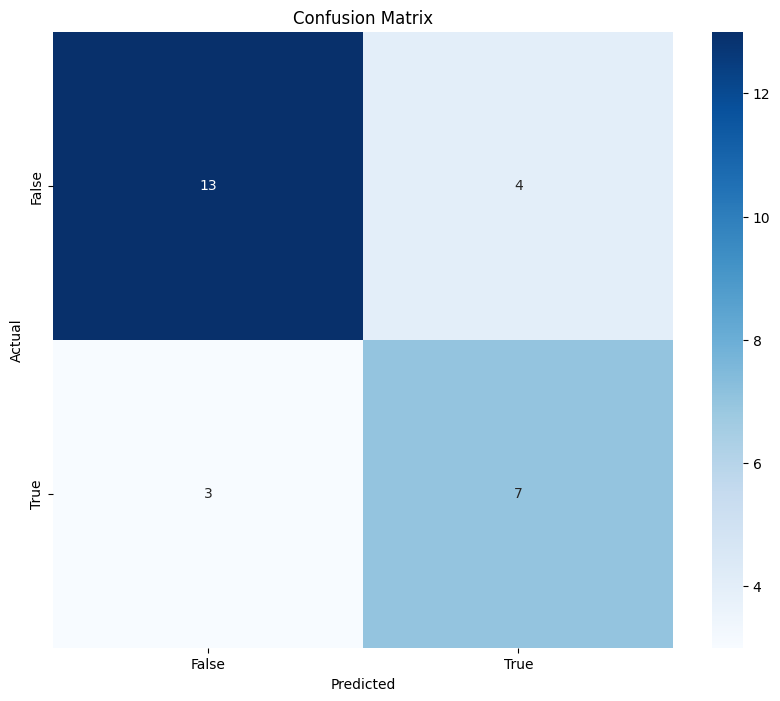

In [9]:
# import os
# import torch
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_selection import SelectFdr, f_classif

# def load_pt_file(file_name):
#     """
#     Load the .pt file and extract the 'opensmile' features.
#     """
#     try:
#         data = torch.load(file_name)
#         opensmile_features = data['opensmile']
#         return opensmile_features
#     except Exception as e:
#         print(f"Error encountered while parsing file: {file_name} - {e}")
#         return None

# # Load the DataFrame containing subject IDs and their corresponding races
# df = selected_df

# # Base directory where the subject folders are located
# base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'

# # PT file suffix to check for
# target_pt_suffix = 'Prolonged-vowel_rec-Prolonged-vowel.pt'

# # Initialize lists to hold features and labels
# features = []
# labels = []

# # Iterate over the DataFrame to process each subject
# for _, row in df.iterrows():
#     subject_id = f"sub-{row['record_id']}"
#     session_id = f"ses-{row['demographics_session_id']}"
#     race = row['airway_stenosis']
#     subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
    
#     if not os.path.exists(subject_folder):
#         print(f"Subject folder does not exist: {subject_folder}")
#         continue

#     # Check if the target PT file exists in the audio folder
#     found_file = False
#     for file_name in os.listdir(subject_folder):
#         if file_name.endswith(target_pt_suffix):
#             file_path = os.path.join(subject_folder, file_name)
#             print(f"Found file: {file_path}")
#             opensmile_features = load_pt_file(file_path)
#             if opensmile_features is not None:
#                 # Flatten the features and append to the list
#                 flattened_features = np.concatenate([opensmile_features[key] for key in opensmile_features.keys()])
#                 features.append(flattened_features)
#                 labels.append(race)
#             found_file = True
#             break
#     if not found_file:
#         print(f"No matching file found for subject {subject_id}")

# # Convert features and labels to numpy arrays
# features = np.array(features).squeeze()  # Remove the extra dimension
# labels = np.array(labels)

# print(f"Number of features extracted: {len(features)}")
# print(f"Number of labels extracted: {len(labels)}")

# # Ensure there are features and labels before proceeding
# if len(features) == 0 or len(labels) == 0:
#     print("No features or labels were extracted. Exiting.")
#     exit()

# # Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(labels)

# # Standardize the features
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# # Split the data into training, testing, and validation sets
# X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, y_encoded, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Feature selection using SelectFdr
# alpha = 0.5  # Set your desired alpha level
# fdr_selector = SelectFdr(f_classif, alpha=alpha)
# X_train_fdr = fdr_selector.fit_transform(X_train, y_train)
# X_val_fdr = fdr_selector.transform(X_val)
# X_test_fdr = fdr_selector.transform(X_test)

# print(f"Number of features selected: {X_train_fdr.shape[1]}")

# # Train a RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_fdr, y_train)

# # Predict on the validation set
# y_val_pred = model.predict(X_val_fdr)

# # Evaluate the model on the validation set
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy}")
# print("Validation Classification Report:")
# print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# # Predict on the test set
# y_test_pred = model.predict(X_test_fdr)

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy}")
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# # Plot Confusion Matrix
# conf_mat = confusion_matrix(y_test, y_test_pred)
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()


Rainbow passage file

Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39\ses-B176636C-3330-4AB4-93A9-1E2305506407\audio\sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39_ses-B176636C-3330-4AB4-93A9-1E2305506407_Rainbow-Passage_rec-Rainbow-Passage.pt
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-1b07b18b-26f9-405b-a466-29442306a7fe\ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2\audio\sub-1b07b18b-26f9-405b-a466-29442306a7fe_ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2_Rainbow-Passage_rec-Rainbow-Passage.pt
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5\ses-B94FE4BC-79FF-46A1-86CC-628E2D77874E\audio\sub-e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5_ses-B94FE4BC-79FF-46A1-86CC-628E2D77874E_Rainbow

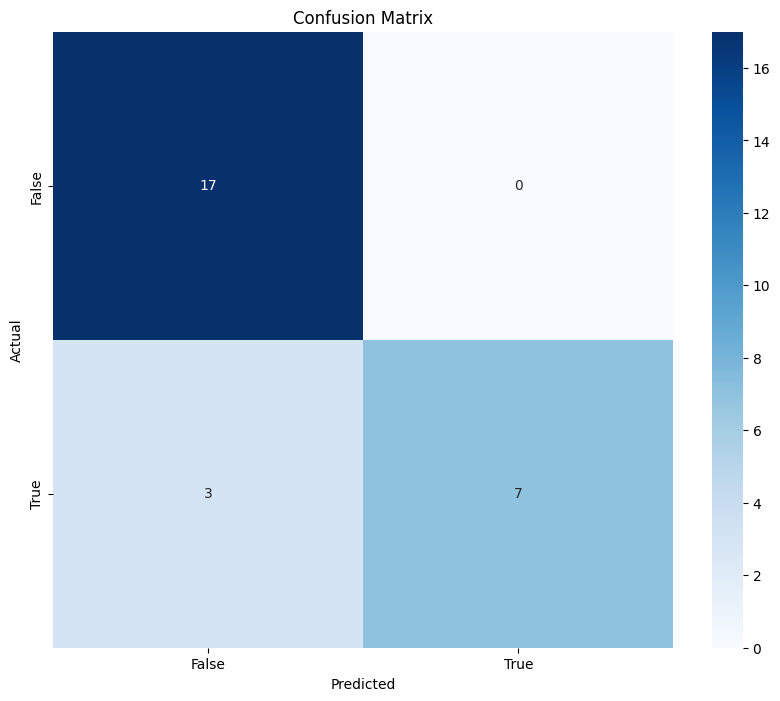

In [17]:
# import os
# import torch
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import ks_2samp

# # Function to load opensmile features from .pt file
# def load_pt_file(file_name):
#     try:
#         data = torch.load(file_name)
#         opensmile_features = data['opensmile']
#         return opensmile_features
#     except Exception as e:
#         print(f"Error encountered while parsing file: {file_name} - {e}")
#         return None

# # Function to perform KS test for a feature against the target variable
# def perform_ks_test(feature, target):
#     stat, pval = ks_2samp(feature[target == 0], feature[target == 1])
#     return pval

# # Load the DataFrame containing subject IDs and their corresponding races
# df = selected_df

# # Base directory where the subject folders are located
# base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'

# # PT file suffix to check for
# target_pt_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.pt'

# # Initialize lists to hold features and labels
# features = []
# labels = []

# # Iterate over the DataFrame to process each subject
# for _, row in df.iterrows():
#     subject_id = f"sub-{row['record_id']}"
#     session_id = f"ses-{row['demographics_session_id']}"
#     race = row['airway_stenosis']
#     subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
    
#     if not os.path.exists(subject_folder):
#         print(f"Subject folder does not exist: {subject_folder}")
#         continue

#     # Check if the target PT file exists in the audio folder
#     found_file = False
#     for file_name in os.listdir(subject_folder):
#         if file_name.endswith(target_pt_suffix):
#             file_path = os.path.join(subject_folder, file_name)
#             print(f"Found file: {file_path}")
#             opensmile_features = load_pt_file(file_path)
#             if opensmile_features is not None:
#                 # Flatten the features and append to the list
#                 flattened_features = np.concatenate([opensmile_features[key] for key in opensmile_features.keys()])
#                 features.append(flattened_features)
#                 labels.append(race)
#             found_file = True
#             break
#     if not found_file:
#         print(f"No matching file found for subject {subject_id}")

# # Convert features and labels to numpy arrays
# features = np.array(features).squeeze()  # Remove the extra dimension
# labels = np.array(labels)

# print(f"Number of features extracted: {len(features)}")
# print(f"Number of labels extracted: {len(labels)}")

# # Ensure there are features and labels before proceeding
# if len(features) == 0 or len(labels) == 0:
#     print("No features or labels were extracted. Exiting.")
#     exit()

# # Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(labels)

# # Standardize the features
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# # Split the data into training, testing, and validation sets
# X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, y_encoded, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Initialize lists to store selected feature names and their p-values
# selected_features = []
# ks_p_values = []

# # Perform KS test for each feature and select features with p-value < 0.05
# selected_feature_indices = []
# for feat_idx in range(X_train.shape[1]):
#     p_value = perform_ks_test(X_train[:, feat_idx], y_train)
#     if p_value < 0.05:
#         selected_feature_indices.append(feat_idx)
#         selected_features.append(list(opensmile_features.keys())[feat_idx])
#         ks_p_values.append(p_value)

# # Create a DataFrame to store selected features and their KS test p-values
# selected_features_df = pd.DataFrame({
#     'Feature': selected_features,
#     'KS Test p-value': ks_p_values
# })

# # Sort the DataFrame by KS test p-values
# selected_features_df = selected_features_df.sort_values(by='KS Test p-value')

# # Print selected features and their KS test p-values
# print("\nSelected Features and their KS Test p-values (p-value < 0.05):")
# print(selected_features_df)

# # Train a RandomForestClassifier with the selected features
# X_train_ks = X_train[:, selected_feature_indices]
# X_val_ks = X_val[:, selected_feature_indices]
# X_test_ks = X_test[:, selected_feature_indices]

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_ks, y_train)

# # Predict on the validation set
# y_val_pred = model.predict(X_val_ks)

# # Evaluate the model on the validation set
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"\nValidation Accuracy: {val_accuracy}")
# print("Validation Classification Report:")
# print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# # Predict on the test set
# y_test_pred = model.predict(X_test_ks)

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"\nTest Accuracy: {test_accuracy}")
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# # Plot Confusion Matrix
# conf_mat = confusion_matrix(y_test, y_test_pred)
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()


In [19]:
# print(selected_features_df.sort_values(by='KS Test p-value'))

                                           Feature  KS Test p-value
8                                 mfcc2_sma3_amean     3.160818e-08
11                           mfcc3_sma3_stddevNorm     2.304583e-07
10                                mfcc3_sma3_amean     2.549764e-07
18                             mfcc2V_sma3nz_amean     1.751902e-06
4                         loudness_sma3_stddevNorm     3.952419e-04
17                        mfcc1V_sma3nz_stddevNorm     4.838334e-04
0      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     1.070945e-03
9                            mfcc2_sma3_stddevNorm     1.126315e-03
20                             mfcc3V_sma3nz_amean     1.346794e-03
13                        jitterLocal_sma3nz_amean     1.753861e-03
6                                 mfcc1_sma3_amean     1.753861e-03
16                             mfcc1V_sma3nz_amean     2.439004e-03
7                            mfcc1_sma3_stddevNorm     2.629169e-03
21                        mfcc3V_sma3nz_stddevNo

Using the selected features from rainbow passage file 

In [ ]:
# import os
# import torch
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# def load_pt_file(file_name):
#     """
#     Load the .pt file and extract the 'opensmile' features.
#     """
#     try:
#         data = torch.load(file_name)
#         opensmile_features = data['opensmile']
#         return opensmile_features
#     except Exception as e:
#         print(f"Error encountered while parsing file: {file_name} - {e}")
#         return None

# # Load the DataFrame containing subject IDs and their corresponding races
# df = selected_df

# # Base directory where the subject folders are located
# base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'

# # PT file suffix to check for
# target_pt_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.pt'

# # Initialize lists to hold features and labels
# features = []
# labels = []

# # Iterate over the DataFrame to process each subject
# for _, row in df.iterrows():
#     subject_id = f"sub-{row['record_id']}"
#     session_id = f"ses-{row['demographics_session_id']}"
#     race = row['new_race___5']
#     subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
    
#     if not os.path.exists(subject_folder):
#         print(f"Subject folder does not exist: {subject_folder}")
#         continue

#     # Check if the target PT file exists in the audio folder
#     found_file = False
#     for file_name in os.listdir(subject_folder):
#         if file_name.endswith(target_pt_suffix):
#             file_path = os.path.join(subject_folder, file_name)
#             print(f"Found file: {file_path}")
#             opensmile_features = load_pt_file(file_path)
#             if opensmile_features is not None:
#                 # Extract only the selected features
#                 selected_feature_values = []
#                 print(selected_features_df['Feature'])
#                 for feature_name in selected_features_df['Feature']:

#                     selected_feature_values.append(opensmile_features[feature_name])
#                 flattened_features = np.concatenate(selected_feature_values)
#                 features.append(flattened_features)
#                 labels.append(race)
#             found_file = True
#             break
#     if not found_file:
#         print(f"No matching file found for subject {subject_id}")

# # Convert features and labels to numpy arrays
# features = np.array(features).squeeze()  # Remove the extra dimension
# labels = np.array(labels)

# print(f"Number of features extracted: {len(features)}")
# print(f"Number of labels extracted: {len(labels)}")

# # Ensure there are features and labels before proceeding
# if len(features) == 0 or len(labels) == 0:
#     print("No features or labels were extracted. Exiting.")
#     exit()

# # Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(labels)

# # Standardize the features
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# # Split the data into training, testing, and validation sets
# X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, y_encoded, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Train a RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predict on the validation set
# y_val_pred = model.predict(X_val)

# # Evaluate the model on the validation set
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy}")
# print("Validation Classification Report:")
# print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# # Predict on the test set
# y_test_pred = model.predict(X_test)

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy}")
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# # Plot Confusion Matrix
# conf_mat = confusion_matrix(y_test, y_test_pred)
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()


when using airway_stenosis as target

Selected Features and their KS Test p-values (p-value < 0.05):
                                           Feature  KS Test p-value
8                                 mfcc2_sma3_amean     3.160818e-08
11                           mfcc3_sma3_stddevNorm     2.304583e-07
10                                mfcc3_sma3_amean     2.549764e-07
18                             mfcc2V_sma3nz_amean     1.751902e-06
4                         loudness_sma3_stddevNorm     3.952419e-04
17                        mfcc1V_sma3nz_stddevNorm     4.838334e-04
0      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     1.070945e-03
9                            mfcc2_sma3_stddevNorm     1.126315e-03
20                             mfcc3V_sma3nz_amean     1.346794e-03
13                        jitterLocal_sma3nz_amean     1.753861e-03
6                                 mfcc1_sma3_amean     1.753861e-03
16                             mfcc1V_sma3nz_amean     2.439004e-03
7                            mfcc1_sma3_stddevNorm     2.629169e-03
21                        mfcc3V_sma3nz_stddevNorm     3.731322e-03
1    F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope     7.321912e-03
12                                mfcc4_sma3_amean     1.786083e-02
15                        F2bandwidth_sma3nz_amean     2.097909e-02
19                        mfcc2V_sma3nz_stddevNorm     3.440882e-02
3   F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope     3.636023e-02
2     F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope     3.869899e-02
22                    StddevVoicedSegmentLengthSec     3.938096e-02
23                     StddevUnvoicedSegmentLength     4.295367e-02
14                F1amplitudeLogRelF0_sma3nz_amean     4.536727e-02
5                  loudness_sma3_stddevRisingSlope     4.729116e-02


When using race as target

Selected Features and their KS Test p-values (p-value < 0.05):
                                    Feature  KS Test p-value
0  F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2         0.009548
1             F2bandwidth_sma3nz_stddevNorm         0.013682
2             slopeV0-500_sma3nz_stddevNorm         0.018135

The pvalue was more than 0.5 & race was not a significant feature initially


when I tried to selsetc the features within smile feature race had very few significant features
Tried to take the features based on airway_stenosis since the distribution of the data was much better compared to race


After using the features selected from opensmile features - RF model has a slightly improved accuracy as shown at last


Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39\ses-B176636C-3330-4AB4-93A9-1E2305506407\audio\sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39_ses-B176636C-3330-4AB4-93A9-1E2305506407_Rainbow-Passage_rec-Rainbow-Passage.pt
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-1b07b18b-26f9-405b-a466-29442306a7fe\ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2\audio\sub-1b07b18b-26f9-405b-a466-29442306a7fe_ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2_Rainbow-Passage_rec-Rainbow-Passage.pt
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5\ses-B94FE4BC-79FF-46A1-86CC-628E2D77874E\audio\sub-e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5_ses-B94FE4BC-79FF-46A1-86CC-628E2D77874E_Rainbow

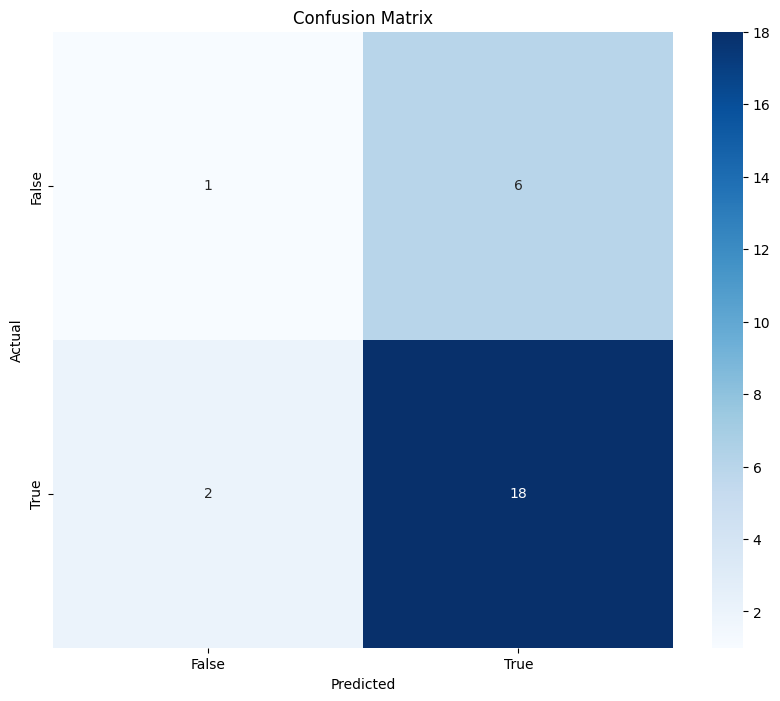

In [15]:
import os
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def load_pt_file(file_name):
    try:
        data = torch.load(file_name)
        opensmile_features = data['opensmile']
        return opensmile_features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name} - {e}")
        return None

# Function to perform KS test for a feature against the target variable
def perform_ks_test(feature, target):
    stat, pval = ks_2samp(feature[target == 0], feature[target == 1])
    return pval

df = selected_df

base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'
target_pt_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.pt'
features = []
labels = []

for _, row in df.iterrows():
    subject_id = f"sub-{row['record_id']}"
    session_id = f"ses-{row['demographics_session_id']}"
    race = row['new_race___5']
    subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
    
    if not os.path.exists(subject_folder):
        print(f"Subject folder does not exist: {subject_folder}")
        continue

    found_file = False
    for file_name in os.listdir(subject_folder):
        if file_name.endswith(target_pt_suffix):
            file_path = os.path.join(subject_folder, file_name)
            print(f"Found file: {file_path}")
            opensmile_features = load_pt_file(file_path)
            if opensmile_features is not None:
                flattened_features = np.concatenate([opensmile_features[key] for key in opensmile_features.keys()])
                features.append(flattened_features)
                labels.append(race)
            found_file = True
            break
    if not found_file:
        print(f"No matching file found for subject {subject_id}")

features = np.array(features).squeeze() 
labels = np.array(labels)

print(f"Number of features extracted: {len(features)}")
print(f"Number of labels extracted: {len(labels)}")
if len(features) == 0 or len(labels) == 0:
    print("No features or labels were extracted. Exiting.")
    exit()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

selected_features = []
ks_p_values = []
# Perform KS test for each feature and select features with p-value < 0.05
selected_feature_indices = []
for feat_idx in range(X_train.shape[1]):
    p_value = perform_ks_test(X_train[:, feat_idx], y_train)
    if p_value < 0.05:
        selected_feature_indices.append(feat_idx)
        selected_features.append(list(opensmile_features.keys())[feat_idx])
        ks_p_values.append(p_value)

selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'KS Test p-value': ks_p_values
})
selected_features_df = selected_features_df.sort_values(by='KS Test p-value')

# KS test p-values
print("\nSelected Features and their KS Test p-values (p-value < 0.05):")
print(selected_features_df)
X_train_ks = X_train[:, selected_feature_indices]
X_val_ks = X_val[:, selected_feature_indices]
X_test_ks = X_test[:, selected_feature_indices]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_ks, y_train)

# validation set
y_val_pred = model.predict(X_val_ks)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# test set
y_test_pred = model.predict(X_test_ks)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39\ses-B176636C-3330-4AB4-93A9-1E2305506407\audio\sub-8d5dc52b-e8aa-42e7-ae54-8f05c4667d39_ses-B176636C-3330-4AB4-93A9-1E2305506407_Rainbow-Passage_rec-Rainbow-Passage.pt
0    F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
1               F2bandwidth_sma3nz_stddevNorm
2               slopeV0-500_sma3nz_stddevNorm
Name: Feature, dtype: object
Found file: C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/sub-1b07b18b-26f9-405b-a466-29442306a7fe\ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2\audio\sub-1b07b18b-26f9-405b-a466-29442306a7fe_ses-8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2_Rainbow-Passage_rec-Rainbow-Passage.pt
0    F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
1               F2bandwidth_sma3nz_stddevNorm
2               slopeV0-500_sma3nz_stddevNorm
Name: F

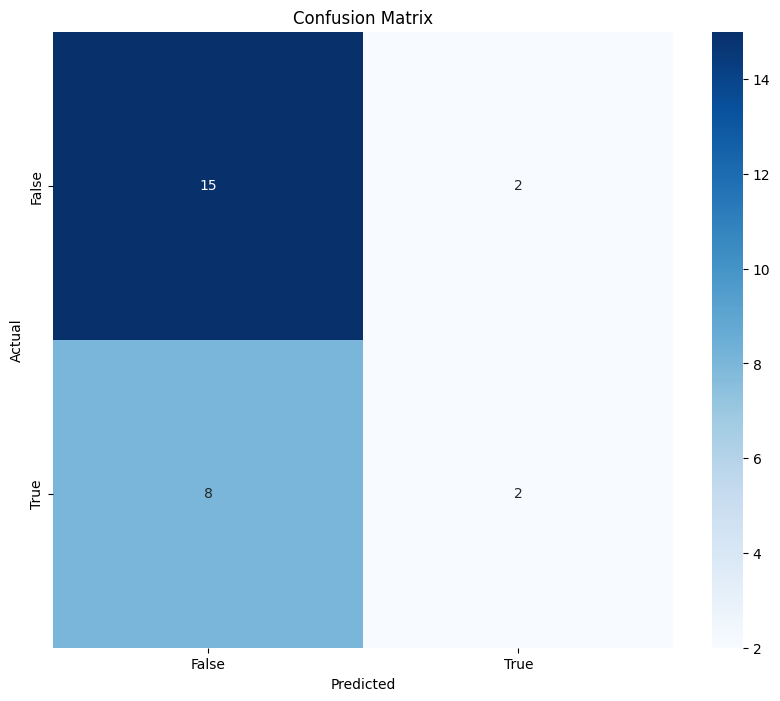

In [16]:
import os
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_pt_file(file_name):
    """
    Load the .pt file and extract the 'opensmile' features.
    """
    try:
        data = torch.load(file_name)
        opensmile_features = data['opensmile']
        return opensmile_features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name} - {e}")
        return None

df = selected_df

# Base directory where the subject folders are located
base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'
target_pt_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.pt'

features = []
labels = []
for _, row in df.iterrows():
    subject_id = f"sub-{row['record_id']}"
    session_id = f"ses-{row['demographics_session_id']}"
    race = row['airway_stenosis']
    subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
    
    if not os.path.exists(subject_folder):
        print(f"Subject folder does not exist: {subject_folder}")
        continue

    found_file = False
    for file_name in os.listdir(subject_folder):
        if file_name.endswith(target_pt_suffix):
            file_path = os.path.join(subject_folder, file_name)
            print(f"Found file: {file_path}")
            opensmile_features = load_pt_file(file_path)
            if opensmile_features is not None:
                selected_feature_values = []
                print(selected_features_df['Feature'])
                for feature_name in selected_features_df['Feature']:

                    selected_feature_values.append(opensmile_features[feature_name])
                flattened_features = np.concatenate(selected_feature_values)
                features.append(flattened_features)
                labels.append(race)
            found_file = True
            break
    if not found_file:
        print(f"No matching file found for subject {subject_id}")

# Convert features and labels to numpy arrays
features = np.array(features).squeeze() 
labels = np.array(labels)

print(f"Number of features extracted: {len(features)}")
print(f"Number of labels extracted: {len(labels)}")

# Ensure there are features and labels before proceeding
if len(features) == 0 or len(labels) == 0:
    print("No features or labels were extracted. Exiting.")
    exit()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

# validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Before true negatives were either 0 or 1